All neccessary imports

In [1]:
import numpy as np
import statistics
import math
from scipy.linalg import solve
import matplotlib.pyplot as plt
from typing import List, Dict


Question 1 - PopulationForecast Class

Running Population Forecast Analysis
Fibonacci sequence for growth projection: [1, 1, 2, 3, 5]

Descriptive Statistics for Historical Population Data

Kampala:
Mean: 1477.00k
Median: 1460.00k
Variance: 42601.11
Standard Deviation: 206.40k

Wakiso:
Mean: 1280.00k
Median: 1260.00k
Variance: 60066.67
Standard Deviation: 245.09k

Gulu:
Mean: 389.50k
Median: 382.50k
Variance: 2885.83
Standard Deviation: 53.72k

Population Projections

Projected Population for Kampala (next 5 years):
[1867 1933 2067 2267 2600]

Projected Population for Wakiso (next 5 years):
[1750 1830 1990 2230 2630]

Projected Population for Gulu (next 5 years):
[498 516 551 604 693]

Variance Comparison: Actual vs. Projected

Kampala:
Actual Data Variance: 42601.11
Projected Data Variance: 87551.20

Wakiso:
Actual Data Variance: 60066.67
Projected Data Variance: 126080.00

Gulu:
Actual Data Variance: 2885.83
Projected Data Variance: 6179.30


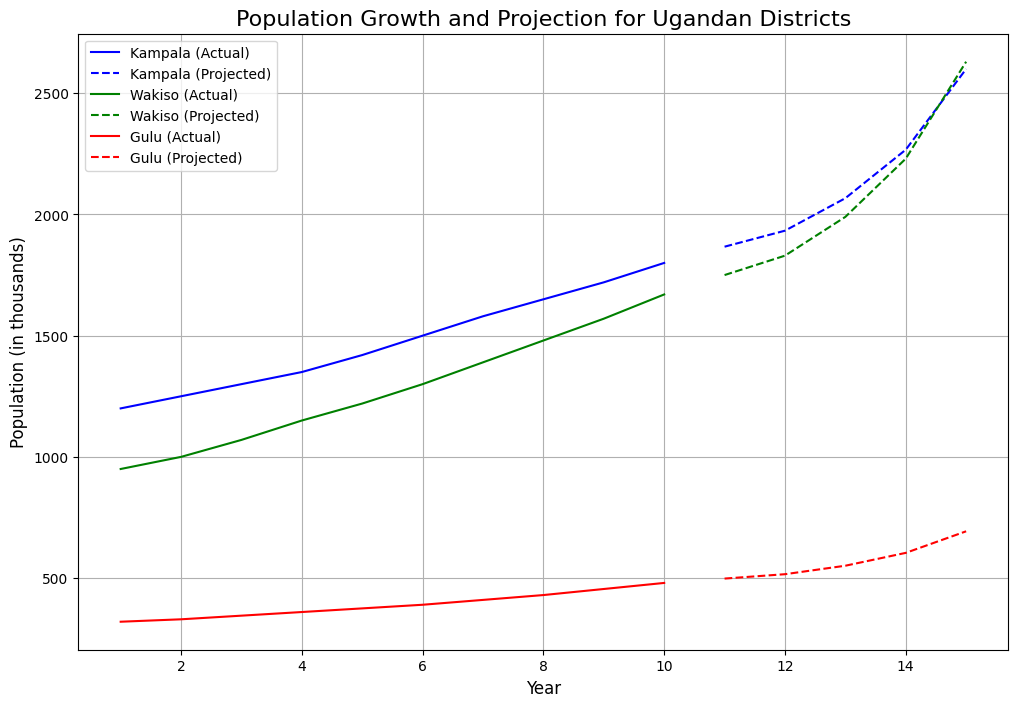

In [2]:
class PopulationForecast:
    """
    Encapsulates the data and analysis for the UBOS Population Forecast.
    """
    def __init__(self):
        # Data for the districts
        self.districts_data = {
            "Kampala": np.array([1200, 1250, 1300, 1350, 1420, 1500, 1580, 1650, 1720, 1800]),
            "Wakiso": np.array([950, 1000, 1070, 1150, 1220, 1300, 1390, 1480, 1570, 1670]),
            "Gulu": np.array([320, 330, 345, 360, 375, 390, 410, 430, 455, 480])
        }
        self.projected_populations = {}
        self.actual_stats = {}
        self.projected_variances = {}

        # Run the analysis directly from the constructor
        print("Running Population Forecast Analysis")
        # 1. Calculate stats for actual data
        for name, data in self.districts_data.items():
            self.actual_stats[name] = self.calculate_stats(data.tolist())

        # 2. Project future growth
        self.project_growth()
        
        # 3. Get variance for projected data
        for name, data in self.projected_populations.items():
            self.projected_variances[name] = statistics.variance(data.tolist())

    def calculate_stats(self, data):
        """
        Calculates statistics for a given list of data.
        Returns a dictionary containing the mean, median, variance, and standard deviation.
        """
        if not data:
            return {}
        return {
            "mean": statistics.mean(data),
            "median": statistics.median(data),
            "variance": statistics.variance(data),
            "stdev": statistics.stdev(data)
        }
    
    def generate_fibonacci(self, n):
        sequence = []
        a, b = 0, 1
        while len(sequence) < n:
            sequence.append(b)
            a, b = b, a + b
        return sequence

    def project_growth(self):
        fib_sequence = self.generate_fibonacci(5)
        print(f"Fibonacci sequence for growth projection: {fib_sequence}")

        for name, data in self.districts_data.items():
            last_population = data[-1]
            avg_increase = (data[-1] - data[0]) / (len(data) - 1)
            
            projections = []
            current_pop = last_population
            for fib_multiplier in fib_sequence:
                current_pop += (avg_increase * fib_multiplier)
                projections.append(round(current_pop))
            
            self.projected_populations[name] = np.array(projections)

    def display_results(self):
        print("\nDescriptive Statistics for Historical Population Data")
        for name, stats in self.actual_stats.items():
            print(f"\n{name}:")
            print(f"Mean: {stats['mean']:.2f}k")
            print(f"Median: {stats['median']:.2f}k")
            print(f"Variance: {stats['variance']:.2f}")
            print(f"Standard Deviation: {stats['stdev']:.2f}k")
        print("\nPopulation Projections")
        for name, proj_data in self.projected_populations.items():
            print(f"\nProjected Population for {name} (next 5 years):")
            print(proj_data)
        print("\nVariance Comparison: Actual vs. Projected")
        for name, stats in self.actual_stats.items():
            print(f"\n{name}:")
            print(f"Actual Data Variance: {stats['variance']:.2f}")
            print(f"Projected Data Variance: {self.projected_variances[name]:.2f}")

    def plot(self):
        actual_years = np.arange(1, 11)
        projected_years = np.arange(11, 16)
        plt.figure(figsize=(12, 8))
        colors = {'Kampala': 'b', 'Wakiso': 'g', 'Gulu': 'r'}
        for name, data in self.districts_data.items():
            color = colors[name]
            plt.plot(actual_years, data, f'{color}-', label=f'{name} (Actual)')
            plt.plot(projected_years, self.projected_populations[name], f'{color}--', label=f'{name} (Projected)')
        plt.title('Population Growth and Projection for Ugandan Districts', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Population (in thousands)', fontsize=12)
        plt.grid(True)
        plt.legend(fontsize=10)
        plt.show()

q1_model = PopulationForecast()
q1_model.display_results()
q1_model.plot()        

Question 2 - SolarGridSimulation Class


Enter Energy Demand for 7 Days

Calculated 7-Day Energy Usage
Solar Panel Usage: [0.26 0.3  0.34 0.38 0.46 0.48 0.52]
Battery Usage:[0.16 0.2  0.24 0.28 0.26 0.38 0.42]

Statistical Analysis of Energy Usage

Solar Panel Usage Stats:
  Mean: 0.39
  Median: 0.38
  Variance: 0.01
  Stdev: 0.10

Battery Usage Stats:
  Mean: 0.28
  Median: 0.26
  Variance: 0.01
  Stdev: 0.09


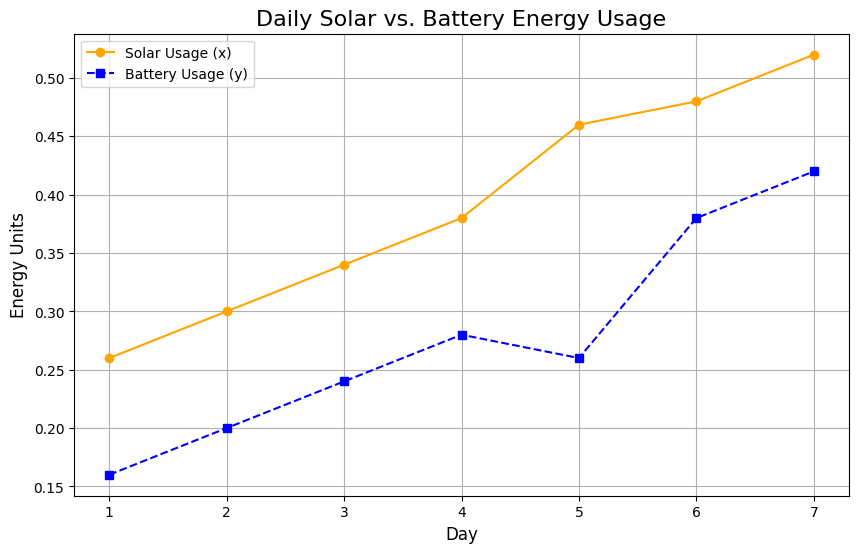

In [3]:
class SolarGridSimulation:
    def __init__(self):
        self.A_matrix = np.array([[3, 2], [4, 1]])
        self.solar_usage = []
        self.battery_usage = []
        self.analysis_results = {}

    def calculate_stats(self, data):
        if not data:
            return {}
        return {
            "mean": statistics.mean(data),
            "median": statistics.median(data),
            "variance": statistics.variance(data),
            "stdev": statistics.stdev(data)
        }

    def run_simulation(self, num_days=7):
       
        print(f"\nEnter Energy Demand for {num_days} Days")
        for day in range(1, num_days + 1):
            while True:
                try:
                    d1 = float(input(f"Day {day} - Enter demand D1: "))
                    d2 = float(input(f"Day {day} - Enter demand D2: "))
                    break
                except ValueError:
                    print("Invalid input. Please enter numeric values.")
            B_vector = np.array([d1, d2])
            solution = solve(self.A_matrix, B_vector)
            self.solar_usage.append(solution[0])
            self.battery_usage.append(solution[1])
        print("\nCalculated 7-Day Energy Usage")
        print(f"Solar Panel Usage: {np.round(np.array(self.solar_usage), 2)}")
        print(f"Battery Usage:{np.round(np.array(self.battery_usage), 2)}")

    def analyze_and_display_results(self):
        
        self.analysis_results['solar'] = self.calculate_stats(self.solar_usage)
        self.analysis_results['battery'] = self.calculate_stats(self.battery_usage)
        print("\nStatistical Analysis of Energy Usage")
        print("\nSolar Panel Usage Stats:")
        for key, value in self.analysis_results['solar'].items():
            print(f"  {key.capitalize()}: {value:.2f}")
        print("\nBattery Usage Stats:")
        for key, value in self.analysis_results['battery'].items():
            print(f"  {key.capitalize()}: {value:.2f}")

    def plot(self):
       
        days = np.arange(1, len(self.solar_usage) + 1)
        plt.figure(figsize=(10, 6))
        plt.plot(days, self.solar_usage, 'o-', color='orange', label='Solar Usage (x)')
        plt.plot(days, self.battery_usage, 's--', color='blue', label='Battery Usage (y)')
        plt.title('Daily Solar vs. Battery Energy Usage', fontsize=16)
        plt.xlabel('Day', fontsize=12)
        plt.ylabel('Energy Units', fontsize=12)
        plt.xticks(days)
        plt.grid(True)
        plt.legend()
        plt.show()


q2_model = SolarGridSimulation()
q2_model.run_simulation() #will prompt for input
q2_model.analyze_and_display_results()
q2_model.plot()

Question 3 - FishExportRiskModel Class

Simulating Fish Data

Fish Stock (units): 
[  1   1   2   3   5   8  13  21  34  55  89 144 233 377 610]

Simulated Prices (UGX per kg): 
[12688 12488 13099 13112 12338 12172 12759 12964 13064 12464 12434 12036
 12811 12203 12049]

Estimated Daily Revenue (UGX): 
[  12688   12488   26198   39336   61690   97376  165867  272244  444176
  685520 1106626 1733184 2984963 4600531 7349890]

Revenue Statistics
Mean:1,306,185.13 UGX
Median:272,244.00 UGX
Variance: 4,536,944,530,622.27

Risk Assessment
High risk (Variance of 4,536,944,530,622.27 is > 50,000)


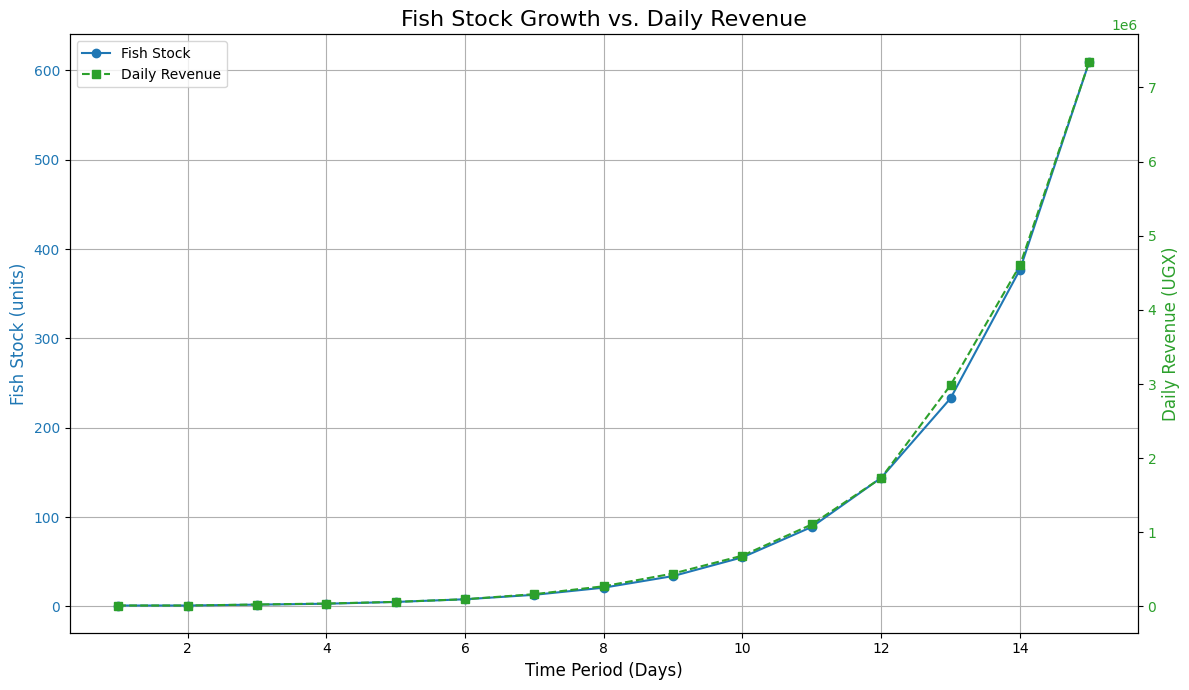

In [4]:
class FishExportRiskModel:
    def __init__(self, num_periods=15):
        self.num_periods = num_periods
        self.fish_stock = np.array([])
        self.fish_prices = np.array([])
        self.daily_revenue = np.array([])
        self.revenue_stats = {}
        self.risk_assessment = ""
        
        # Run model from constructor
        self.simulate_data()
        self.daily_revenue = self.fish_stock * self.fish_prices
        self.revenue_stats = self.calculate_stats(self.daily_revenue.tolist())
        risk_threshold = 50000
        if self.revenue_stats.get('variance', 0) > risk_threshold:
            self.risk_assessment = f"High risk (Variance of {self.revenue_stats['variance']:,.2f} is > {risk_threshold:,})"
        else:
            self.risk_assessment = f"Low risk (Variance of {self.revenue_stats['variance']:,.2f} is <= {risk_threshold:,})"

    def calculate_stats(self, data):
        if not data:
            return {}
        return {
            "mean": statistics.mean(data),
            "median": statistics.median(data),
            "variance": statistics.variance(data),
            "stdev": statistics.stdev(data)
        }

    def generate_fibonacci(self, n):
        sequence = []
        a, b = 0, 1
        while len(sequence) < n:
            sequence.append(b)
            a, b = b, a + b
        return sequence

    def simulate_data(self):
        print("Simulating Fish Data")
        self.fish_stock = np.array(self.generate_fibonacci(self.num_periods))
   
        self.fish_prices = np.round(np.random.randint(11800, 13200, size=self.num_periods))

    def display_results(self):
        
        print(f"\nFish Stock (units): \n{self.fish_stock}")
        print(f"\nSimulated Prices (UGX per kg): \n{self.fish_prices}")
        print(f"\nEstimated Daily Revenue (UGX): \n{self.daily_revenue}")
        print("\nRevenue Statistics")
        print(f"Mean:{self.revenue_stats['mean']:,.2f} UGX")
        print(f"Median:{self.revenue_stats['median']:,.2f} UGX")
        print(f"Variance: {self.revenue_stats['variance']:,.2f}")
        print("\nRisk Assessment")
        print(self.risk_assessment)

    def plot(self):

        periods = np.arange(1, self.num_periods + 1)
        fig, ax1 = plt.subplots(figsize=(12, 7))
        color1 = 'tab:blue'
        ax1.set_xlabel('Time Period (Days)', fontsize=12)
        ax1.set_ylabel('Fish Stock (units)', color=color1, fontsize=12)
        ax1.plot(periods, self.fish_stock, 'o-', color=color1, label='Fish Stock')
        ax1.tick_params(axis='y', labelcolor=color1)
        ax2 = ax1.twinx()
        color2 = 'tab:green'
        ax2.set_ylabel('Daily Revenue (UGX)', color=color2, fontsize=12)
        ax2.plot(periods, self.daily_revenue, 's--', color=color2, label='Daily Revenue')
        ax2.tick_params(axis='y', labelcolor=color2)
        plt.title('Fish Stock Growth vs. Daily Revenue', fontsize=16)
        ax1.grid(True)
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        fig.tight_layout()
        plt.show()

q3_model = FishExportRiskModel()
q3_model.display_results()
q3_model.plot()        

Question 4 - WeatherAnalysis Class

Running Weather and Agriculture Analysis

Kampala Rainfall Analysis
Mean Annual Rainfall: 133.33mm
Monthly Classifications:
Month 1: 120mm -> Drought risk
Month 2: 140mm -> Drought risk
Month 3: 180mm -> Good for maize
Month 4: 200mm -> Good for maize
Month 5: 220mm -> Good for maize
Month 6: 180mm -> Good for maize
Month 7: 90mm -> Drought risk
Month 8: 70mm -> Drought risk
Month 9: 60mm -> Drought risk
Month 10: 100mm -> Drought risk
Month 11: 110mm -> Drought risk
Month 12: 130mm -> Drought risk

Gulu Rainfall Analysis
Mean Annual Rainfall: 105.00mm
Monthly Classifications:
Month 1: 80mm -> Drought risk
Month 2: 90mm -> Drought risk
Month 3: 130mm -> Drought risk
Month 4: 150mm -> Drought risk
Month 5: 160mm -> Good for maize
Month 6: 140mm -> Drought risk
Month 7: 110mm -> Drought risk
Month 8: 100mm -> Drought risk
Month 9: 90mm -> Drought risk
Month 10: 80mm -> Drought risk
Month 11: 70mm -> Drought risk
Month 12: 60mm -> Drought risk

Trend Similarity Analysis
Cosine Similarity 

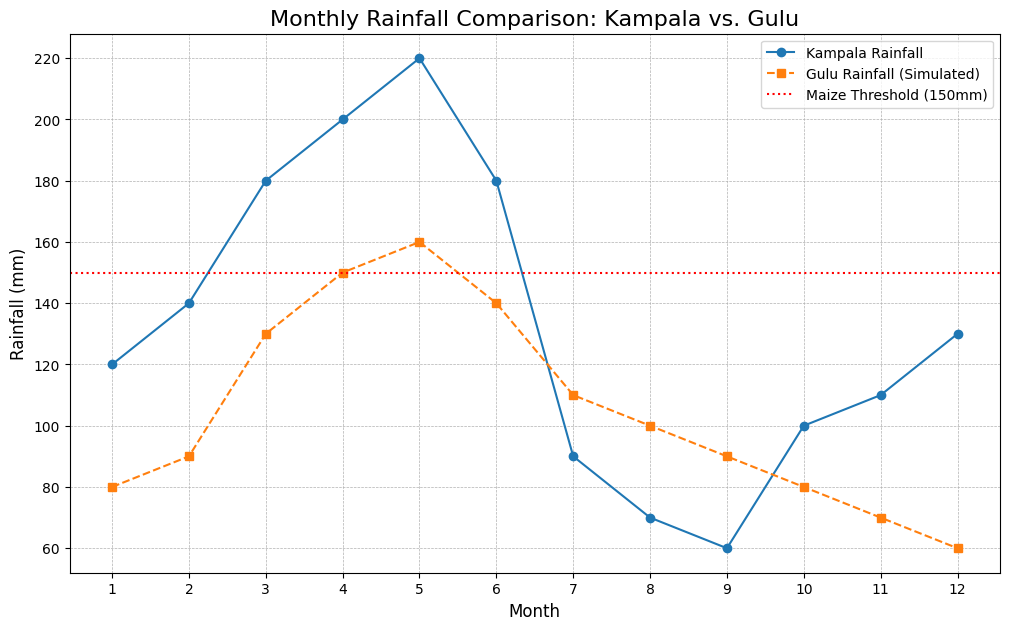

In [5]:
class WeatherAnalysis:
    def __init__(self, kampala_data, gulu_data):
        self.rainfall_data = {
            "Kampala": np.array(kampala_data),
            "Gulu": np.array(gulu_data)
        }
        self.analysis_results = {}
        self.similarity_score = 0.0

        # Run analysis from constructor
        print("Running Weather and Agriculture Analysis")
        for region, data in self.rainfall_data.items():
            self.classify_months(data, region)
        kampala_vec = self.rainfall_data['Kampala']
        gulu_vec = self.rainfall_data['Gulu']
        self.similarity_score = self.calculate_cosine_similarity(kampala_vec, gulu_vec)

    def classify_months(self, data, region_name):
        mean_rainfall = np.mean(data)
        classifications = [
            'Good for maize' if month > 150 else 'Drought risk'
            for month in data
        ]
        self.analysis_results[region_name] = {
            'mean_rainfall': mean_rainfall,
            'monthly_classification': classifications
        }
    
    def calculate_cosine_similarity(self, vec1, vec2):
        dot_product = np.dot(vec1, vec2)
        return math.cos(dot_product) 

    def display_results(self):
        
        for region, results in self.analysis_results.items():
            print(f"\n{region} Rainfall Analysis")
            print(f"Mean Annual Rainfall: {results['mean_rainfall']:.2f}mm")
            print("Monthly Classifications:")
            for i, classification in enumerate(results['monthly_classification']):
                print(f"Month {i+1}: {self.rainfall_data[region][i]}mm -> {classification}")
        print("\nTrend Similarity Analysis")
        print(f"Cosine Similarity between Kampala and Gulu: {self.similarity_score:.4f}")
        print("(A score closer to 1 means the rainfall patterns are very similar; a score closer to 0 means they are dissimilar.)")

    def plot(self):

        months = np.arange(1, 13)
        plt.figure(figsize=(12, 7))
        plt.plot(months, self.rainfall_data['Kampala'], 'o-', label='Kampala Rainfall')
        plt.plot(months, self.rainfall_data['Gulu'], 's--', label='Gulu Rainfall (Simulated)')
        plt.axhline(y=150, color='r', linestyle=':', label='Maize Threshold (150mm)')
        plt.title('Monthly Rainfall Comparison: Kampala vs. Gulu', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Rainfall (mm)', fontsize=12)
        plt.xticks(months)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.show()
# 4.1: Store Kampala's rainfall data
kampala_rainfall = [120, 140, 180, 200, 220, 180, 90, 70, 60, 100, 110, 130]

# 4.3: Simulate Gulu's rainfall with different values

gulu_simulated_rainfall = [80, 90, 130, 150, 160, 140, 110, 100, 90, 80, 70, 60]

# Create an instance of the class and run the analysis
q4_model = WeatherAnalysis(kampala_rainfall, gulu_simulated_rainfall)

# Display the text-based results and the plot
q4_model.display_results()
q4_model.plot()

Question 5 - TaxiRevenueAnalysis Class

Running Taxi Revenue & Variability Analysis

Daily Revenue Analysis
Daily Revenues (UGX): [ 70000  80000  84000 100000 110000 120000  96000 104000  94000  90000]

Revenue Statistics
Mean:94,800.00 UGX
Variance: 217,066,666.67
Standard Deviation: 14,733.18 UGX

Simple Supply-Demand Model
Assumptions:
    - Total Trips: 10.00
    - Morning trips are 2 more than evening: 2.00
  Solution:
    Estimated Morning Trips: 6.00
    Estimated Evening Trips: 4.00

Revenue Forecast
  Forecasted Revenue for Day 11 (avg of last 3 days): 96,000.00 UGX


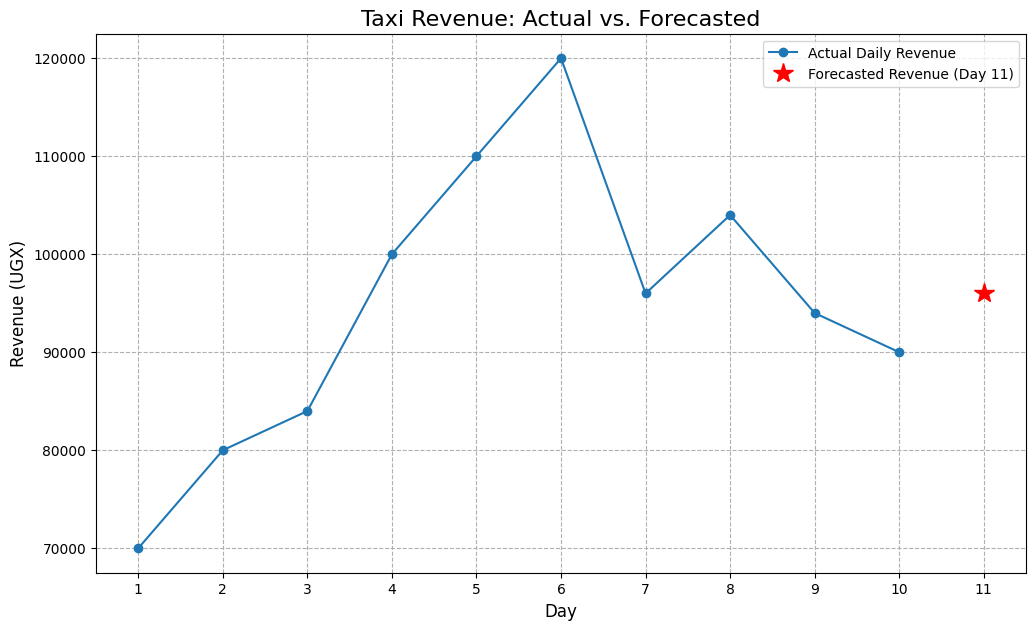

In [6]:
class TaxiRevenueAnalysis:
    def __init__(self, passenger_data):
        self.passenger_counts = np.array(passenger_data)
        self.fare_per_passenger = 2000
        self.daily_revenues = np.array([])
        self.revenue_stats = {}
        self.supply_demand_solution = {}
        self.forecasted_revenue = 0.0

        # Run analysis from constructor
        print("Running Taxi Revenue & Variability Analysis")
        self.calculate_revenues()
        self.revenue_stats = self.calculate_stats(self.daily_revenues.tolist())
        self.model_supply_demand()
        self.forecast_next_day()

    def calculate_stats(self, data):
        if not data:
            return {}
        return {
            "mean": statistics.mean(data),
            "variance": statistics.variance(data),
            "stdev": statistics.stdev(data)
        }

    def calculate_revenues(self):
        self.daily_revenues = self.passenger_counts * self.fare_per_passenger

    def model_supply_demand(self):
        # Assume morning trips (x) are always 2 more than evening trips (y)
        # and total trips are 10.
        # Eq1: x + y = 10
        # Eq2: x - y = 2
        A_matrix = np.array([[1, 1], [1, -1]])
        B_vector = np.array([10, 2])
        
        solution = solve(A_matrix, B_vector)
        self.supply_demand_solution = {
            'morning_trips (x)': solution[0],
            'evening_trips (y)': solution[1],
            'assumptions': {
                'Total Trips': 10,
                'Morning trips are 2 more than evening': 2,
            }
        }

    def forecast_next_day(self):
        if len(self.daily_revenues) >= 3:
            self.forecasted_revenue = np.mean(self.daily_revenues[-3:])
        else:
            self.forecasted_revenue = np.mean(self.daily_revenues)

    def display_results(self):
        
        print("\nDaily Revenue Analysis")
        print(f"Daily Revenues (UGX): {self.daily_revenues}")
        print("\nRevenue Statistics")
        print(f"Mean:{self.revenue_stats['mean']:,.2f} UGX")
        print(f"Variance: {self.revenue_stats['variance']:,.2f}")
        print(f"Standard Deviation: {self.revenue_stats['stdev']:,.2f} UGX")
        print("\nSimple Supply-Demand Model")
        print("Assumptions:")
        for key, value in self.supply_demand_solution['assumptions'].items():
            print(f"    - {key}: {value:.2f}")
        print("  Solution:")
        print(f"    Estimated Morning Trips: {self.supply_demand_solution['morning_trips (x)']:.2f}")
        print(f"    Estimated Evening Trips: {self.supply_demand_solution['evening_trips (y)']:.2f}")
        print("\nRevenue Forecast")
        print(f"  Forecasted Revenue for Day 11 (avg of last 3 days): {self.forecasted_revenue:,.2f} UGX")

    def plot(self):
        
        days = np.arange(1, 11)
        plt.figure(figsize=(12, 7))
        plt.plot(days, self.daily_revenues, 'o-', label='Actual Daily Revenue')
        plt.plot(11, self.forecasted_revenue, 'r*', markersize=15, label=f'Forecasted Revenue (Day 11)')
        plt.title('Taxi Revenue: Actual vs. Forecasted', fontsize=16)
        plt.xlabel('Day', fontsize=12)
        plt.ylabel('Revenue (UGX)', fontsize=12)
        plt.xticks(np.arange(1, 12))
        plt.grid(True, linestyle='--')
        plt.legend()
        plt.show()
# 5.1: Store passenger counts
passenger_counts = [35, 40, 42, 50, 55, 60, 48, 52, 47, 45]

# Create an instance of the class
q5_model = TaxiRevenueAnalysis(passenger_counts)

# Display the results and plot
q5_model.display_results()
q5_model.plot()